## Data Preprocessing

In [1]:
import pandas as pd

# Import data
df = pd.read_parquet("train.parquet", engine='fastparquet')

In [2]:
# Import target channels
tar_chan = pd.read_csv("target_channels.csv")

# Extracting channels to monitor as an array
# These channels are useful for when we apply the algorithm to the whole dataset.
channels = tar_chan['target_channels'].to_numpy()

# Extracting channel subset for algorithim building and testing: Recommended by ESA to be used for development.
train_channels = ['channel_41', 'channel_42', 'channel_43', 'channel_44', 'channel_45', 'channel_46']

In [3]:
# Getting basic info on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14728321 entries, 0 to 14728320
Data columns (total 89 columns):
 #   Column           Dtype  
---  ------           -----  
 0   id               int64  
 1   channel_1        float32
 2   channel_10       float32
 3   channel_11       float32
 4   channel_12       float32
 5   channel_13       float32
 6   channel_14       float32
 7   channel_15       float32
 8   channel_16       float32
 9   channel_17       float32
 10  channel_18       float32
 11  channel_19       float32
 12  channel_2        float32
 13  channel_20       float32
 14  channel_21       float32
 15  channel_22       float32
 16  channel_23       float32
 17  channel_24       float32
 18  channel_25       float32
 19  channel_26       float32
 20  channel_27       float32
 21  channel_28       float32
 22  channel_29       float32
 23  channel_3        float32
 24  channel_30       float32
 25  channel_31       float32
 26  channel_32       float32
 27  channel_33

In [4]:
# Checking for missing values
pd.set_option('display.max_rows', None) # Displays all rows in cell output
df.isna().any()
# Data is complete

id                 False
channel_1          False
channel_10         False
channel_11         False
channel_12         False
channel_13         False
channel_14         False
channel_15         False
channel_16         False
channel_17         False
channel_18         False
channel_19         False
channel_2          False
channel_20         False
channel_21         False
channel_22         False
channel_23         False
channel_24         False
channel_25         False
channel_26         False
channel_27         False
channel_28         False
channel_29         False
channel_3          False
channel_30         False
channel_31         False
channel_32         False
channel_33         False
channel_34         False
channel_35         False
channel_36         False
channel_37         False
channel_38         False
channel_39         False
channel_4          False
channel_40         False
channel_41         False
channel_42         False
channel_43         False
channel_44         False


In [5]:
# Change dtype of telecommands for memory optimization
# Telecommands are binary controls (only uses values 0 and 1)
# The dtype can be changed from float64 to int8 to reduce memory usage
telecommands = ['telecommand_244', 'telecommand_350', 'telecommand_351', 'telecommand_352', 'telecommand_352', 'telecommand_353',
                'telecommand_354', 'telecommand_36', 'telecommand_376', 'telecommand_38', 'telecommand_39', 'telecommand_40']
for command in telecommands:
    df[command] = df[command].astype('int8')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14728321 entries, 0 to 14728320
Data columns (total 89 columns):
 #   Column           Dtype  
---  ------           -----  
 0   id               int64  
 1   channel_1        float32
 2   channel_10       float32
 3   channel_11       float32
 4   channel_12       float32
 5   channel_13       float32
 6   channel_14       float32
 7   channel_15       float32
 8   channel_16       float32
 9   channel_17       float32
 10  channel_18       float32
 11  channel_19       float32
 12  channel_2        float32
 13  channel_20       float32
 14  channel_21       float32
 15  channel_22       float32
 16  channel_23       float32
 17  channel_24       float32
 18  channel_25       float32
 19  channel_26       float32
 20  channel_27       float32
 21  channel_28       float32
 22  channel_29       float32
 23  channel_3        float32
 24  channel_30       float32
 25  channel_31       float32
 26  channel_32       float32
 27  channel_33

In [6]:
# Checking for class imbalance
df['is_anomaly'].value_counts()
# Dataset features a class imbalance, where only about 10% of data contains anomalies/rare events

is_anomaly
0    13184217
1     1544104
Name: count, dtype: int64

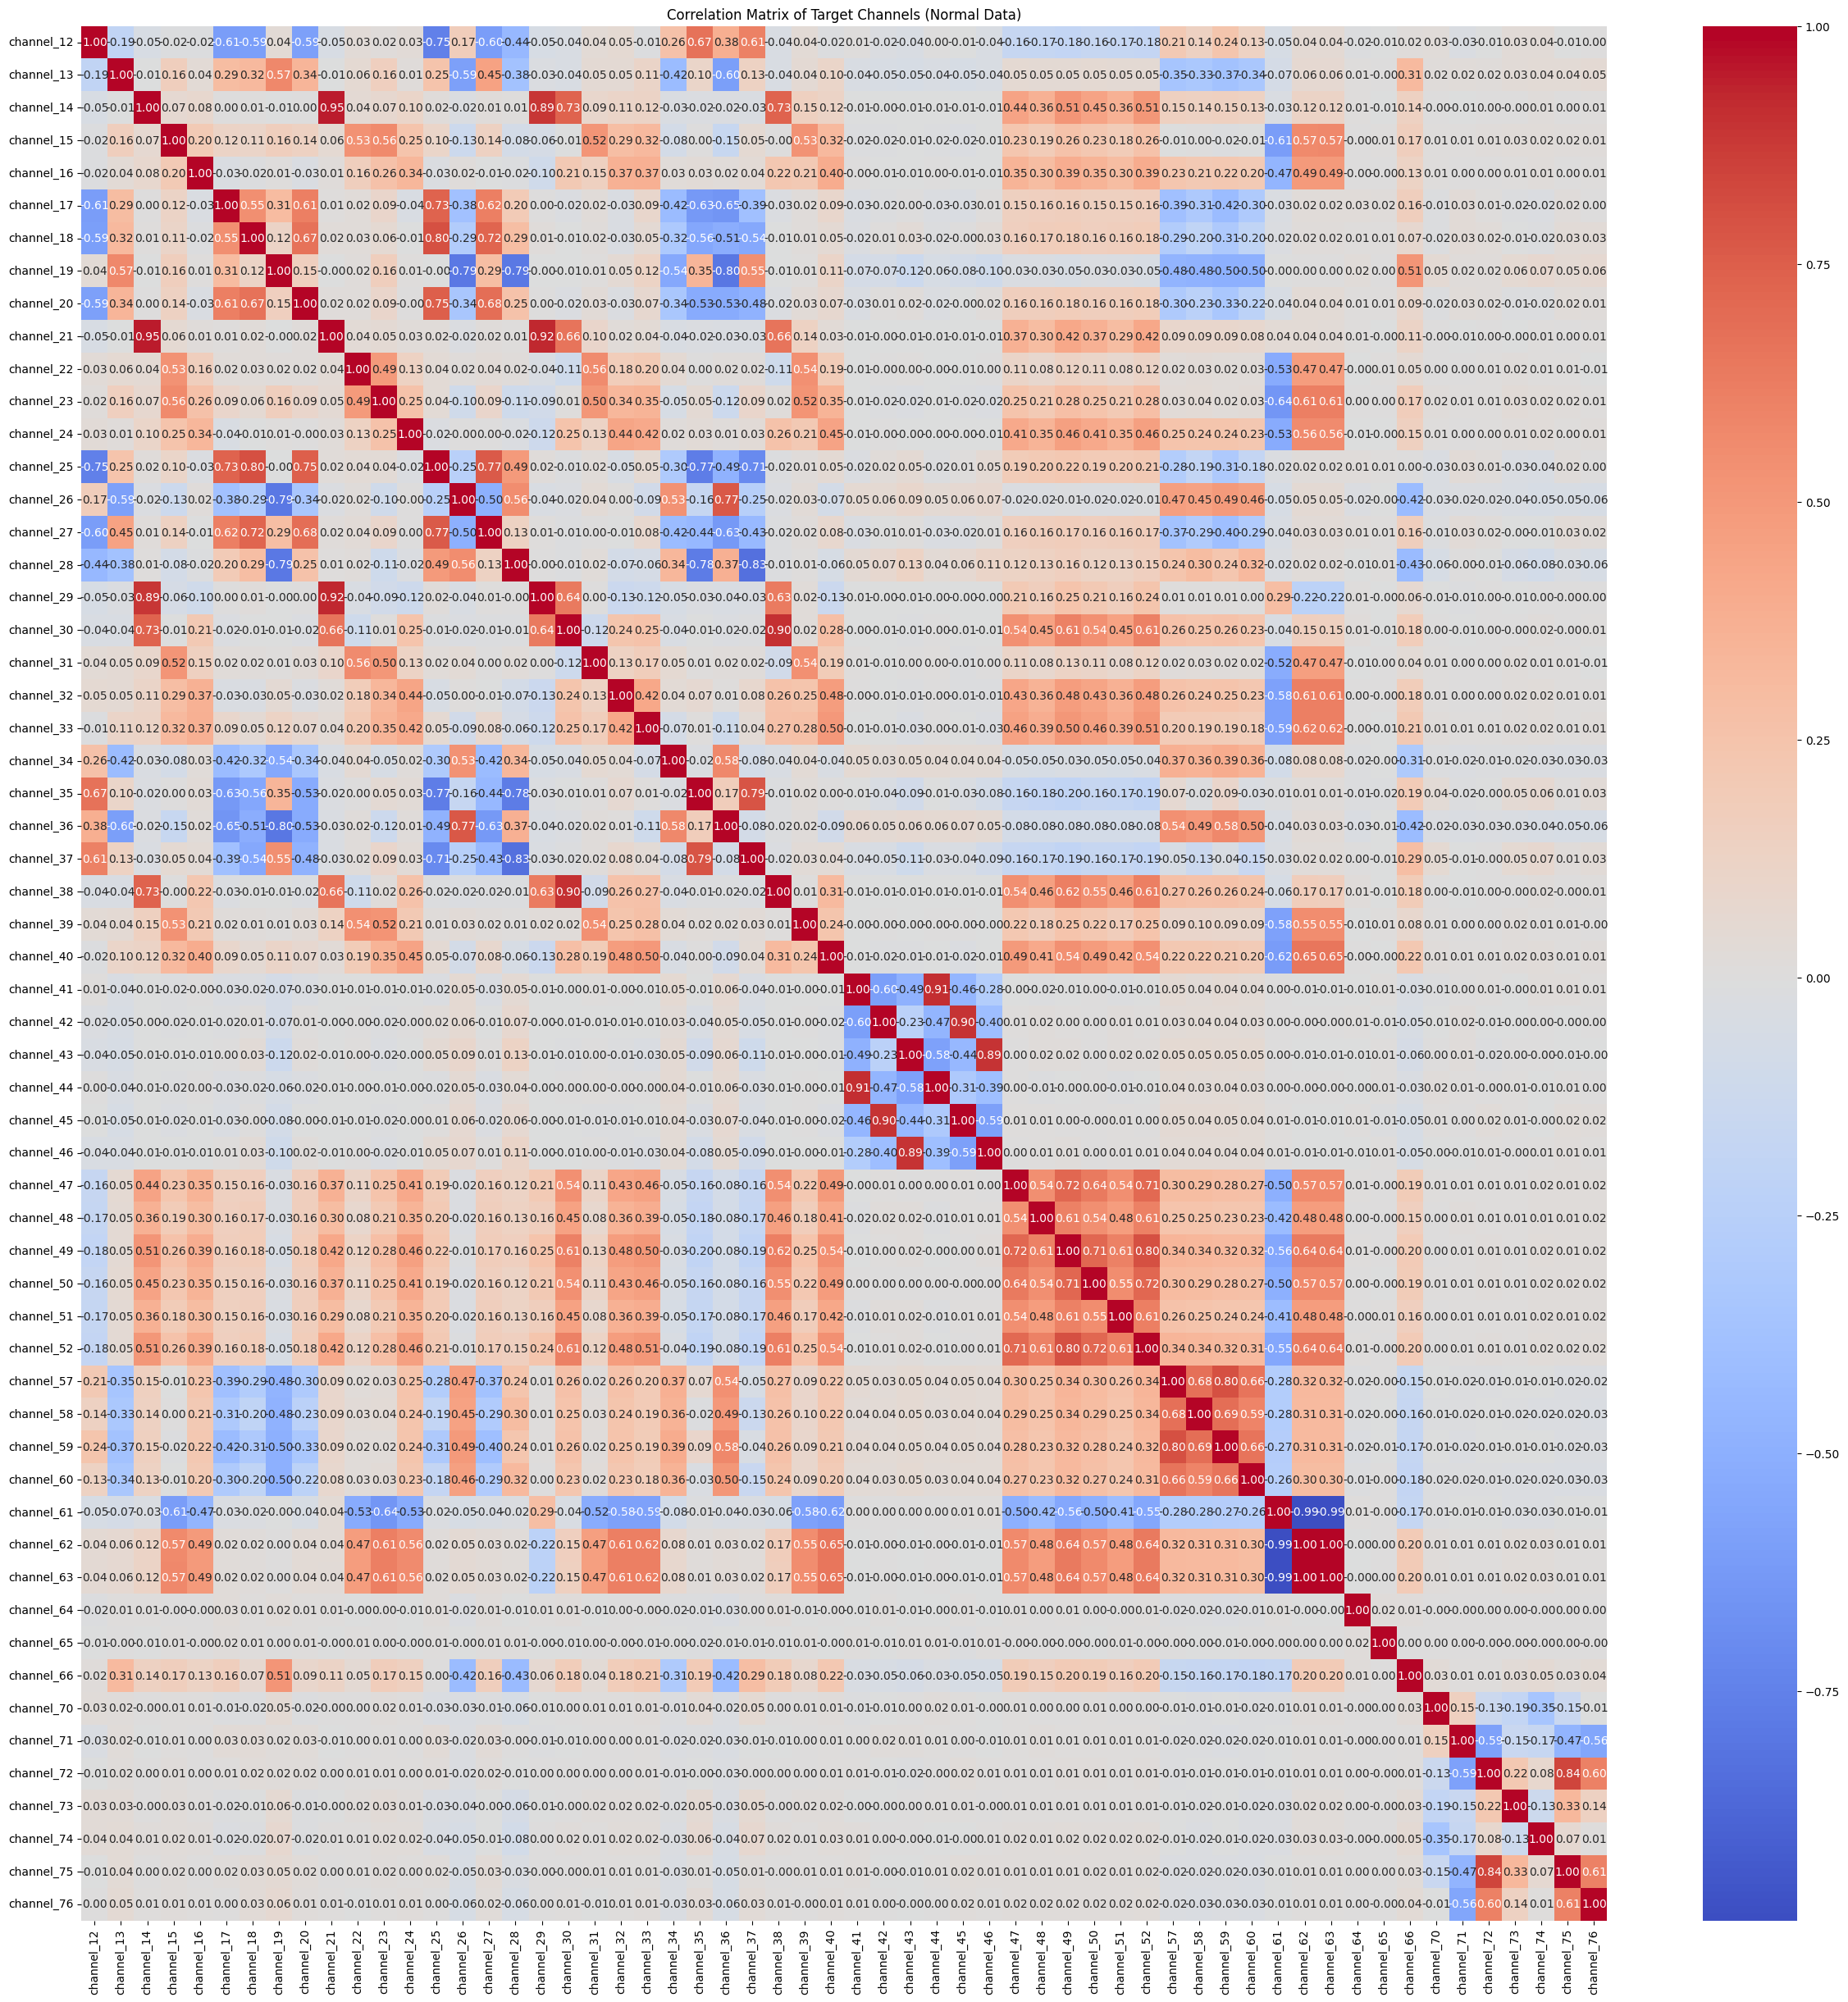

In [9]:
# Correlation matrix of target channels
import matplotlib.pyplot as plt
import seaborn as sns

corr = df[df['is_anomaly'] == 0][channels][100000:200000].corr(method='pearson')
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Target Channels (Normal Data)')
plt.show()

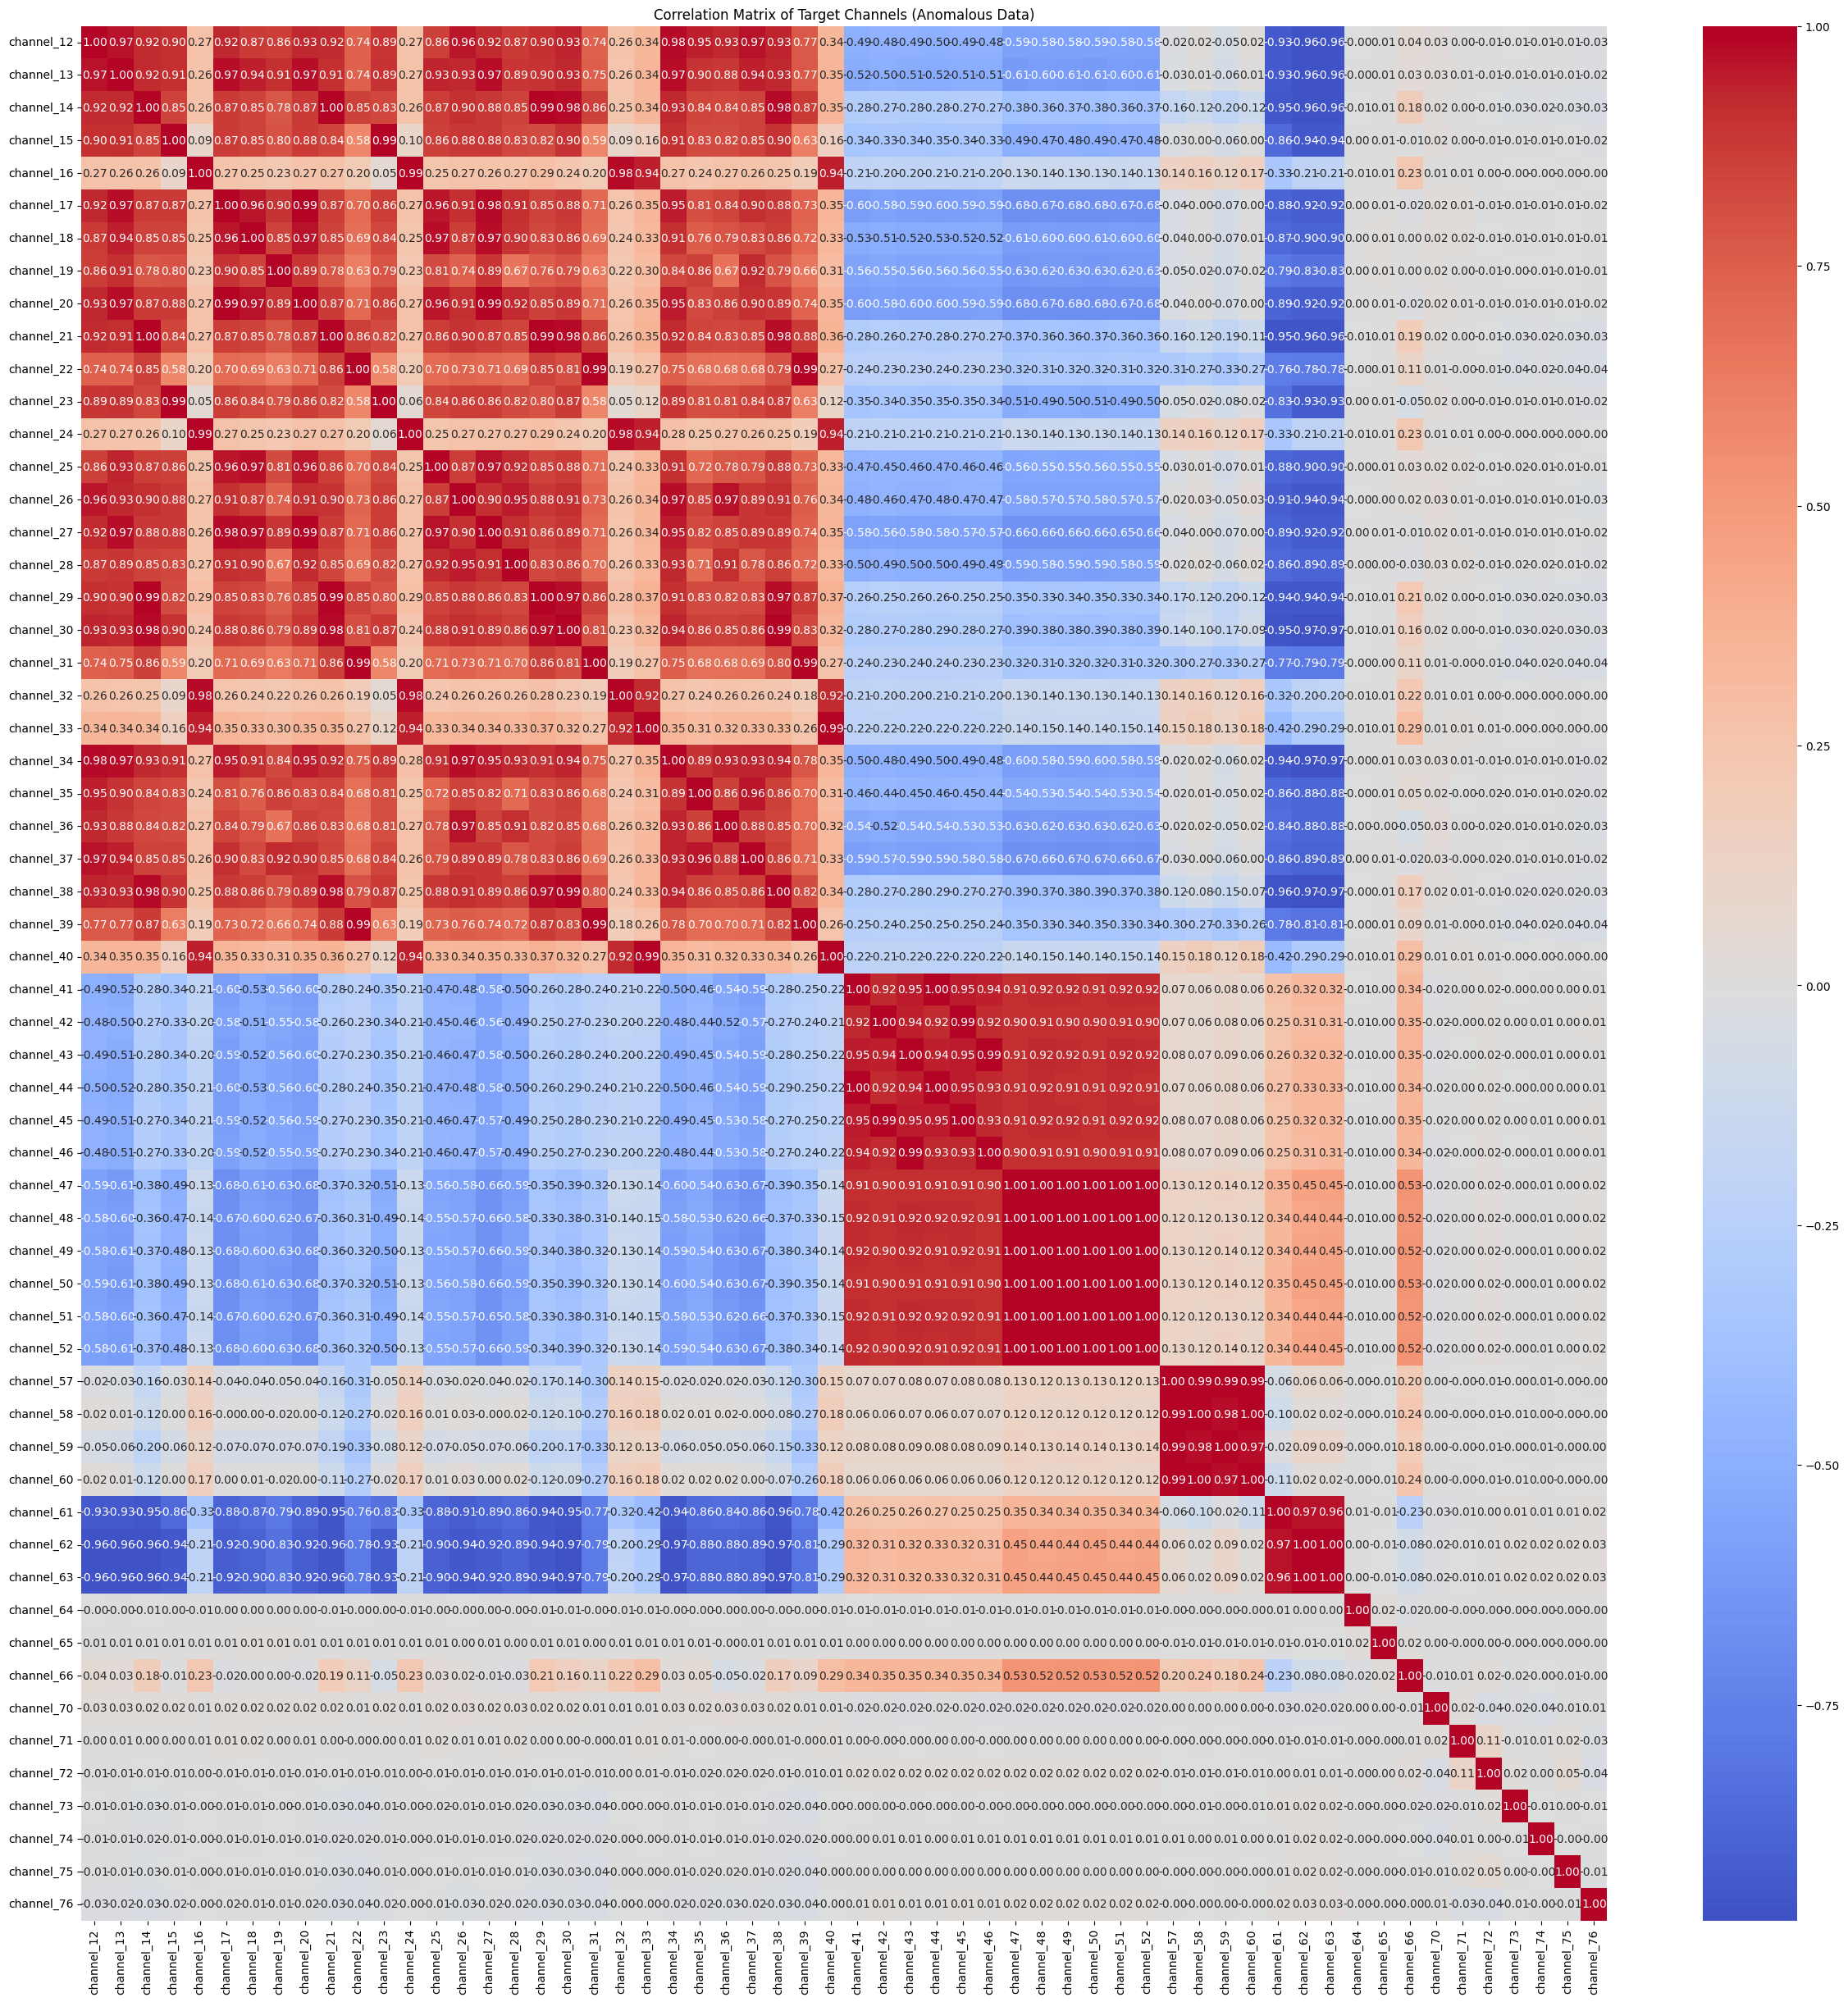

In [10]:
# Same correlation matrix but for anomalous data
corr = df[df['is_anomaly'] == 1][channels][100000:200000].corr(method='pearson')
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Target Channels (Anomalous Data)')
plt.show()

Relationships change during anomalies: correlations become much stronger in both positive and negative directions. The earlier channels seem to have a much greater impact in anomalous data compared to the latter.

<module 'matplotlib.pyplot' from 'c:\\Users\\torre\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

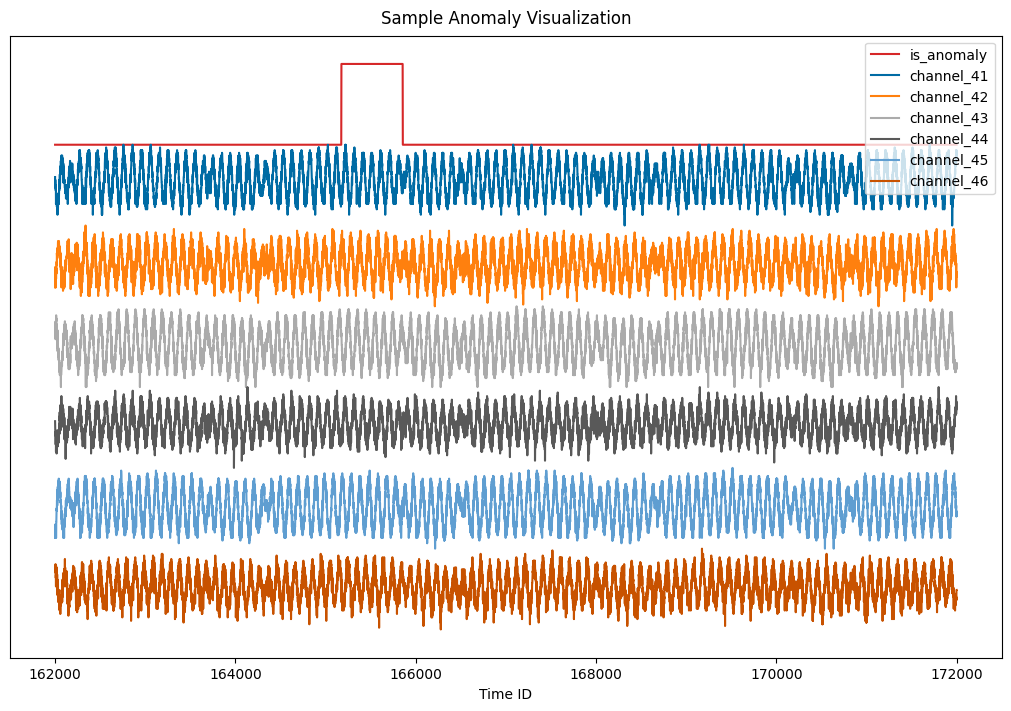

In [ ]:
# Visualization of anomaly within dataset
import matplotlib as mpl

# Colorblind-friendly color palette
mpl.style.use('tableau-colorblind10')

def visualize_anomaly(df, train_channels, start, end):
    plt.figure(figsize=(10, 7), layout='constrained')
    # Anomaly time point range
    start = 162000
    end = 172000

    plt.plot(df['id'][start:end], df['is_anomaly'][start:end] + 1, label='is_anomaly', color='tab:red')

    for i, channel in enumerate(train_channels):
        val = df[channel][start:end]
        val = (val - val.min()) / (val.max() - val.min()) # Normalization for better visualization

        plt.plot(df['id'][start:end], val - i, label=channel)

    plt.xlabel('Time ID')
    plt.yticks([])
    plt.suptitle('Sample Anomaly Visualization')
    plt.legend(loc='upper right')
    return plt

visualize_anomaly(df, train_channels, 162000, 172000)

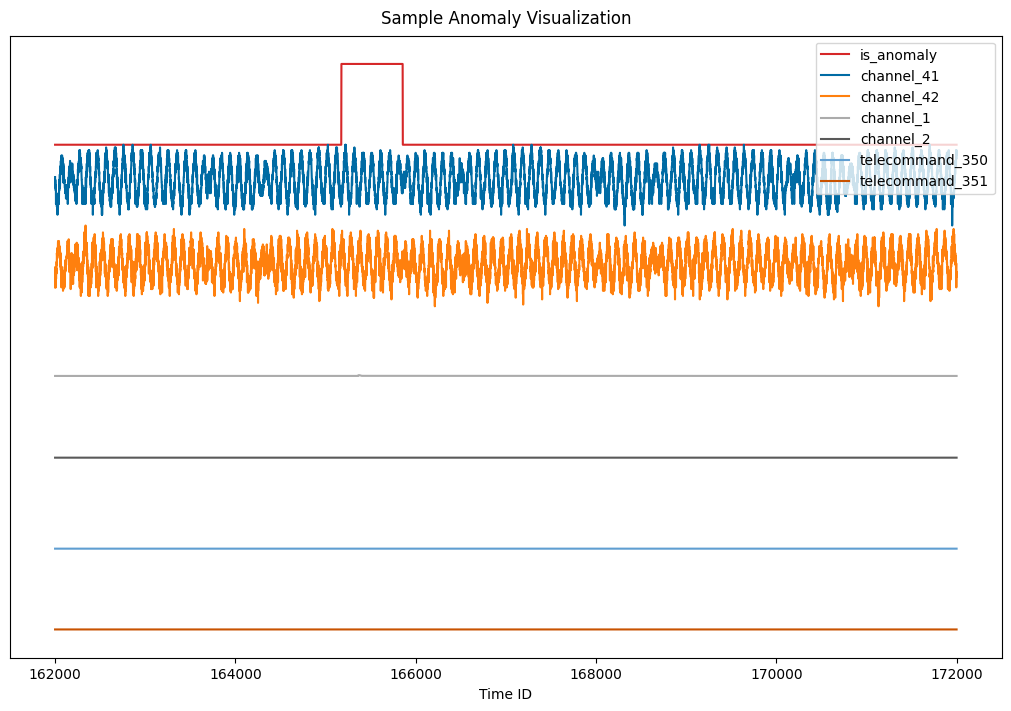

In [42]:
# Sample anomaly including the different types of channels
sample_channels = ['channel_41', 'channel_42','channel_1', 'channel_2', 'telecommand_350', 'telecommand_351']
plt.figure(figsize=(10, 7), layout='constrained')
# Anomaly time point range
start = 162000
end = 172000

plt.plot(df['id'][start:end], df['is_anomaly'][start:end] + 1, label='is_anomaly', color='tab:red')

for i in range(0,2):
    channel = sample_channels[i]
    val = df[channel][start:end]
    val = (val - val.min()) / (val.max() - val.min()) # Normalization for better visualization

    plt.plot(df['id'][start:end], val - i, label=channel)
for i in range(2,6):
    channel = sample_channels[i]
    val = df[channel][start:end]
    plt.plot(df['id'][start:end], val - i, label=channel)

plt.xlabel('Time ID')
plt.yticks([])
plt.suptitle('Sample Anomaly Visualization')
plt.legend(loc='upper right')

By plotting a small window of an anamolous sample surrounded by normal satellite behavior, the channel data shows subtlety in operations between normal and anomalous behavior. 

It's difficult to distinguish and real difference in channel data between normal and anomalous behavior, hence a model is required.

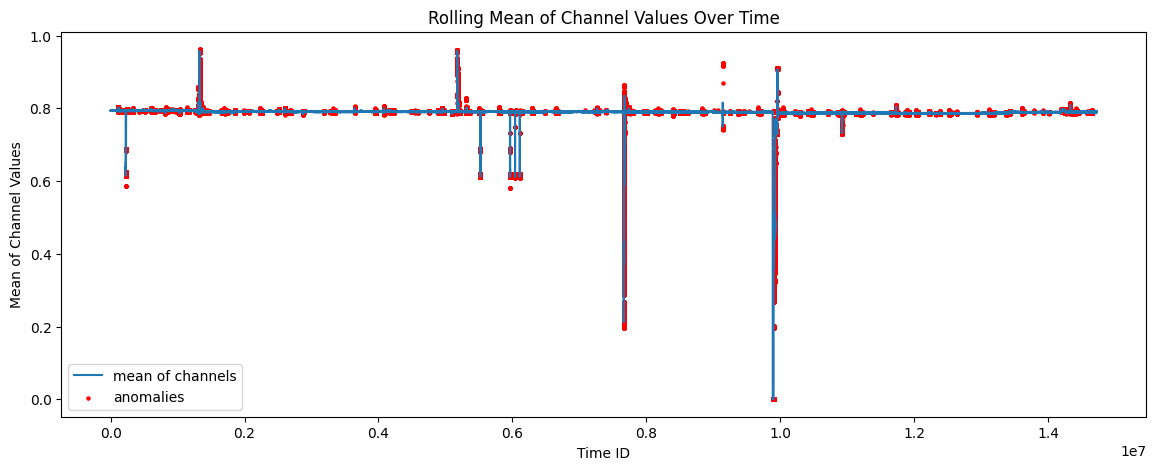

In [ ]:
# Visualize mean of data subset 
import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))
# Plot rolling mean
plt.plot(df["id"], df[train_channels].mean(axis=1).rolling(window=200, center=True).mean(), label='mean of channels')

# Overlay anomalous points in red
anomalies = df['is_anomaly'] == 1
plt.scatter(df['id'][anomalies], df[train_channels].mean(axis=1)[anomalies], color='red', label='anomalies', s=5)

plt.title('Rolling Mean of Channel Values Over Time')
plt.xlabel('Time ID')
plt.ylabel('Mean of Channel Values')
plt.legend(loc='lower left')
plt.show()

Takeaways from this plot:

- Spacecraft system is usually consistent, hovering at around 0.8 for most of the mission.
- Anomalies cluster around sharp increases/decreases of spacecraft operation.
- Anomalies are typical in events where multiple channels will change simultaneously.
- Anomalies that occur during consistent operations are more subtle anomalies - likely influenced by auxiliary data and codependence between channels.

In [7]:
# Creating features
#X = df.drop(['is_anomaly', 'id'], axis=1) --- this is for the full dataset ---
X = df[train_channels] # for algorithm building
y = df['is_anomaly']

# Creating a validation split
t_end = int(0.8 * len(X)) # using 80:20 split
X_train, y_train = X[:t_end], y[:t_end]
X_val, y_val = X[t_end:], y[t_end:]

# Sampling a small subset for algorithm development and testing
#t_train_end = int(0.1 * len(X)) 
#t_val_end = int(0.02 * len(X)) 
#X_train, y_train = X[:t_train_end], y[:t_train_end]
#X_val, y_val = X[t_train_end:t_train_end+t_val_end], y[t_train_end:t_train_end+t_val_end]

# Scaling the feature data
from sklearn.preprocessing import RobustScaler
# Robust scaler is known to be more robust to outliers, which is useful for this dataset as it contains anomalies (outliers).
sc = RobustScaler()

# Fit scaler on non-anomalous samples
sc.fit(X_train[y_train == 0])

X_train = sc.transform(X_train)
X_val = sc.transform(X_val)
print("Dataset shape (training):", X_train.shape, y_train.shape)
print("Dataset shape (validation):", X_val.shape, y_val.shape)
# Expect: (num timesteps, num channels) for X and (num timesteps,) for y

Dataset shape (training): (11782656, 6) (11782656,)
Dataset shape (validation): (2945665, 6) (2945665,)


In [21]:
# Bin the discrete data using sliding windows
import torch
from torch.utils.data import Dataset, DataLoader

class SlidingWindowDataset(Dataset):
    def __init__(self, X, y, window_size):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.float16)
        self.window_size = window_size

    def __len__(self):
        return len(self.X) - self.window_size

    def __getitem__(self, idx):
        X = self.X[idx:idx+self.window_size]
        y = self.y[idx+self.window_size - 1]
        X = X.permute(1, 0) # (window_size, num_channels) -> (num_channels, window_size)
        return (X, y)

windows = 128
batch_size = 64

train_ds = SlidingWindowDataset(X_train, y_train, window_size=windows) 
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True) 

val_ds = SlidingWindowDataset(X_val, y_val, window_size=windows)
val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

## Building the model

I will be building an Temporal Convolutional Network (TCN) using PyTorch. This architecture is designed for sequence modeling, where window data is processed through a convolutional neural network similarly to how images are processed. This allows for parallel processing and for better memory for patterns within data. 

In [22]:
import torch.nn as nn
import torch.nn.functional as F

# Build the Temporal CNN section
class TemporalCNN(nn.Module):
    def __init__(self, num_channels, out_channels, dilation, kernel_size=3):
        super().__init__()
        padding = (kernel_size - 1) * dilation
        self.pad = padding
        self.conv1 = nn.Conv1d(num_channels, out_channels, kernel_size=kernel_size, padding=padding, dilation=dilation)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size=kernel_size, padding=padding, dilation=dilation)
        self.downsample = (nn.Conv1d(num_channels, out_channels, kernel_size=1) if num_channels != out_channels else None) # For residual connection
        

    def forward(self, x):
        residual = x 
        x = F.relu(self.conv1(x))
        if self.pad > 0:
            x = x[:, :, :-self.pad] # Remove padding
        x = F.relu(self.conv2(x))
        if self.pad > 0:
            x = x[:, :, :-self.pad] 
        
        if self.downsample is not None:
            residual = self.downsample(residual)
        return F.relu(x + residual) 

In [10]:
# Build the classifier for the model (uses output of the temporal CNN)
class TCNClassifier(nn.Module):
    def __init__(self, num_features, num_channels=[32, 32, 64], kernel_size=3):
        super().__init__()
        layers = []
        in_chan = num_features

        # Building a list of convolutional layers
        for i, out in enumerate(num_channels):
             layers.append(TemporalCNN(in_chan, out, dilation=2**i, kernel_size=kernel_size))
             in_chan = out

        # Piecing the list together
        self.tcn = nn.Sequential(*layers)
        self.fc = nn.Linear(in_chan, 1) # Output layer for binary classification

    def forward(self, x):
        x = self.tcn(x)
        x = torch.mean(x, dim=2) # Mean pooling to capture entire window
        logits = self.fc(x)
        return logits.view(-1)

In [ ]:
# Training loop configuration
model = TCNClassifier(num_features=X_train.shape[1])
model = torch.compile(model)
pos_weight = torch.tensor([10.0]) # Example positive class weight to address class imbalance
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scaler = torch.amp.GradScaler('cuda') # For mixed precision training

# One training step
def train_one_epoch(model, train_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    batch_count = 0

    for x_batch, y_batch in train_loader:
        optimizer.zero_grad()
        x_batch, y_batch = x_batch.to(device), y_batch.float().to(device)

        with torch.amp.autocast('cuda'): # Mixed precision for faster training
            logits = model(x_batch)
            loss = criterion(logits, y_batch)
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        total_loss += loss.item()
        batch_count += 1

    return total_loss / batch_count

# Collect predictions to reconstruct the full sequence for evaluation
@torch.no_grad()
def predict_sequence(model, loader, device):
    model.eval()
    all_probs = []
    all_labels = []

    for x_batch, y_batch in loader:
        x_batch = x_batch.to(device)
        logits = model(x_batch)
        probs = torch.sigmoid(logits)
        all_probs.append(probs.detach().cpu().reshape(-1))
        all_labels.append(y_batch.reshape(-1))
    
    probs = torch.cat(all_probs).numpy()
    labels = torch.cat(all_labels).numpy()

    return probs, labels

# Smooth the predictions to reduce noise
import numpy as np

def smooth_probs(probs, k=5):
    return np.convolve(probs, np.ones(k)/k, mode='same')

In [ ]:
# Convert timestamps into events
def extract_events(pred):
    events = []
    start = None

    for i, p in enumerate(pred):
        if p == 1 and start is None:
            start = i
        elif p == 0 and start is not None:
            events.append((start, i-1))
            start = None

    if start is not None: # Handle case where sequence ends with an event
        events.append((start, len(pred)-1))

    return events

# Event-wise evaluation of the model's predictions: As per ESA's recommendation
def event_metrics(pred, gt):
    pred_events = extract_events(pred)
    gt_events = extract_events(gt)

    tp = 0
    fn = 0
    matched = set()

    for g in gt_events:
        for i, p in enumerate(pred_events):
            if i in matched:
                continue
            overlap = not (p[1] < g[0] or p[0] > g[1])
            if overlap:
                tp += 1
                matched.add(i)
                break
    
    fp = len(pred_events) - tp
    fn = len(gt_events) - tp
    fp_t = ((pred == 1) & (gt == 0)).sum()
    n_t = len(pred)

    precision_corr = (tp / (tp + fp)) * (1 - (fp_t / n_t)) 
    recall_e = tp / (tp + fn)
    beta2 = 0.5**2

    f05 = (1 + beta2) * (precision_corr * recall_e) / (beta2 * precision_corr + recall_e + 1e-8)
    return f05

In [ ]:
# Full training loop
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
num_epochs = 10
best_f05 = 0
best_t = 0

for epoch in range(num_epochs):
    train_loss = train_one_epoch(model, train_loader, criterion, optimizer, device)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {train_loss:.4f}")

    # Evaluate on validation set
    val_probs, val_labels = predict_sequence(model, val_loader, device)
    val_probs = smooth_probs(val_probs)

#    for t in np.linspace(0.01, 0.5, 50):  # Try different thresholds
    val_pred = (val_probs > 0.2).astype(int)
    f05_score = event_metrics(val_pred, val_labels)

    if f05_score > best_f05:
        best_f05 = f05_score
        best_t = t
        print(f"Best threshold: {t:.2f}, F0.5 Score: {f05_score:.4f}")  
        torch.save(model.state_dict(), 'best_model.pth')
        print("Best model saved with F0.5 Score:", best_f05)

Epoch 1/10, Loss: 2.6113
Best threshold: 0.01, F0.5 Score: 0.0108
Best model saved with F0.5 Score: 0.010775388325498325
Best threshold: 0.02, F0.5 Score: 0.0125
Best model saved with F0.5 Score: 0.01245994511290987
Best threshold: 0.03, F0.5 Score: 0.0129
Best model saved with F0.5 Score: 0.01290995053851393
Best threshold: 0.05, F0.5 Score: 0.0131
Best model saved with F0.5 Score: 0.013068057539029981
Best threshold: 0.06, F0.5 Score: 0.0133
Best model saved with F0.5 Score: 0.01325089776214263
Epoch 2/10, Loss: 7.1201
Best threshold: 0.02, F0.5 Score: 0.0174
Best model saved with F0.5 Score: 0.017410146169495638
Best threshold: 0.03, F0.5 Score: 0.0190
Best model saved with F0.5 Score: 0.019013362884982562
Best threshold: 0.04, F0.5 Score: 0.0196
Best model saved with F0.5 Score: 0.019559387125976144
Best threshold: 0.05, F0.5 Score: 0.0201
Best model saved with F0.5 Score: 0.020063443368082044
Best threshold: 0.08, F0.5 Score: 0.0201
Best model saved with F0.5 Score: 0.020104914922